<a href="https://colab.research.google.com/github/denocris/MHPC-Natural-Language-Processing-Lectures-2020/blob/master/lecture_1_intro_to_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing Introduction

## Presentation and Course Description


### Who am I?

I am Cristiano De Nobili. Here a slide with my path [*from physics to somewhere!*](https://docs.google.com/presentation/d/1xQ5VqDFYvDWu6cmu9OsqnSZGMOV9pgI25Cy2AFprR3k/edit?usp=sharing).


### My Contacts
For any questions or doubts you can find my contacts here:

* [Linkedin](https://www.linkedin.com/in/cristiano-de-nobili/) and [Twitter](https://twitter.com/denocris) (here I regulary post about AI and Science news)
* My [Personal Website](https://denocris.com)
* My [Instagram](https://www.instagram.com/denocris/?hl=it) (I am a Pilot, so here I mostly post about traveling, flying and adventures)
* My recent TEDx on [AI and Human Creativity](https://youtu.be/8-hrmer9d_E)

### Course Repository

All notebooks can be found [here!](https://github.com/denocris/MHPC-Natural-Language-Processing-Lectures-2020)



---



---




### Course Presentation and Outline


This year's course will be about Deep Learning for Natural Language Processing. It is completely different from last year course. Around 80% of the material is new and state-of-the-art. That means that it did not exist last year. I apologize in advance if there are some typos. I prepared it from scratch just for you. The deep learning framework chosen for this year is [PyTorch](https://pytorch.org/). In addition, we will take advantages of two NLP libraries: [spaCy](https://spacy.io) by Explosion AI and [Transformers](https://github.com/huggingface/transformers) by Hugging Face.

If you are interested in last year course, it was about Generative Models. In particular Variational Autoencoders (denoising) and Sequence-to-sequence models (as character-based spell-checker). Here you can find last year course [Repo](https://github.com/denocris/MHPC-DeepLearning-Lectures-2019).

#### Outline

* Lecture 1: intro to NLP, text preprocessing, non-contextual word embedding, contextual word embedding.

* Lecture 2: NLP with Transformers (by Hugging Face)

* Letrue 3: word-sense disambiguation with Italian RoBERTa, embeddings visualization

#### Disclaimer

* NLP is a huge topics. It is impossible to cover it all in a few hours. If during the lectures some parts of the code appear to you mysterious do not worry. All the notebooks are yours (and it is a lot of material!) and you can play with them in the next weeks if you are interested.

* NLP is evolving very fast. For instance, in the last year many fundamental things have changed. From algorithms to tools and libraries. Also for experts of the fields, it is impossible to stay fully updated.

### Why Colab? 
Colab (Google Colaboratory) is a free cloud service based on Jupyter Notebooks that supports free GPU!!

Lectures will be held through Colab Notebooks. To download each notebook there are few and really simple steps to do:

## What is Natural Language Processing?

Natural Language Processing is a branch of computer science and artificial intelligence that enables computers to extract meaning from unstructured text.Computers are super-fast and super-good to process this kind of problem:

```
import pandas as pd
df = pd.read_csv(r'all_pubs_in_italy.csv')  
df[df.menu.str.contains('spritz')]
```

but they are structured problems. Even if the computer is processing a text, somehow this text is not as natural as the Human language:

`"Ehi, ciao... mi diresti tutti i locali in cui posso bere uno spritz?"`

The language-processing capabilities of the human mind have been considered the most complex task for artificial intelligence. Human language is full of ambiguities.

<center>  <img src="https://docs.google.com/uc?export=download&id=1BaKxrGQb_sPdtK-rFSNkrUv8e30P_4N4" width="650" height="400"> </center> 

Moreover...

- Language is highly ambiguous at all levels: 
	- (Homophonic)  `l’amorale/la morale - hanno/anno - ai/hai` or `There is no right way to write a great novel`.
	- (Sintactic)  `Chiara ha visto Luca in giardino con il cannocchiale`, `Chiara saw Luca inthe garden with a telescope.`
	- (Irony)  `Il mio volo è in ritardo. Splendido! `, `My flight is delayed. Wonderful! `
- Humans often express their intent through semantically inaccurate language (dialects, sociolets, speech registers, errors when typing...)


In addition, computers do not directly understand words. Classical approaches to NLP, were based on *rule-based AI* (*symbolic AI systems*) in which software engineers explicity specified the rules of parsing the meaning of language. This was labor-intensive and had limited application. 

The past few years NLP has been revolutionazed by **Deep Learning**!

---

Advances in the field of NLP have even paved the way for new applications. Here some of the most common examples:

- Text Classification
- Text Clustering
- Text Summarisation
- Machine Translation
- Sentiment Analysis
- Question Answering
- Digital Assistant and Chatbot



## Text Preprocessing

For these lectures, I decided to put more emphasis on modern algorithms and tools, such as transformer-based models and Transformer libraries. However, one fundamental part of every machine learning project is data exploration and data cleaning. Feeding dirty data into a model will give us results that are meaningless. Keep in mind, "*garbage in, garbage out*". Especially in NLP, text preprocessing/cleaning can be very sophisticated and time-consuming. We will now briefly scatch some common tools.

Here an example of an original review:

```
“I love my &lt;3 iphone &amp; you’re awsm apple. DisplayIsAwesome, sooo happppppy 🙂 http://www.apple.com”
```

We will now list some common steps

**Common data cleaning steps:** 

Each of this step is not always needed!

1. Make text all lower case 
2. Expand abbreviations
3. Remove punctuation
4. Remove numerical values or converting numbers into words
5. Remove extra whitespace
6. Remove stop words

**More data preprocessing steps after tokenization:**

7. Tokenize text
8. Stemming / lemmatization
9. Parts of speech tagging
10. NER (Named Entity Recognition)
11. Deal with typos

After this celaning pipeline, text is still in word-form. However, computer understands only numbers. Therefore, before feeding a neural network with some text, we must perform a last step

12. <font color='green'> Word Embedding </font> 


So let use start with some cleaning. We will take advantage just of **re** and **string** python packages. In my personal experience, I prefer to do all these steps with bash scripting (awk, sed, grep, ecc...) but for consistency here I listed them in python. Here you can find a [one-year old notebook](https://github.com/denocris/Deep-Learning-Lectures_NLP/blob/master/01_text_preprocessing.ipynb) where I show text cleaning also with bash tools.

In [0]:
import re
import string


# Text Lowercase:
# Lowercasing the text is used to reduce the size of the vocabulary of our text data, since it reduce text entropy.
# 'Science' and 'science' became a single word to analyze.
def text_lowercase(text):
    return text.lower() 

# Remove punctuation:
# String punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punctuation(text): 
    no_punct_text = "".join([char for char in text if char not in string.punctuation])
    return no_punct_text

# Remove whitespaces -----------------------------------------------------------
# Use the join and split function to remove all the white spaces in a string
def remove_whitespace(text): 
    return  " ".join(text.split()) 


def remove_unwanted_text(text):
  new_text = str(text)  
  new_text = re.sub('3+[0-9]{9}', '<mobilephone>', new_text) # adding <mobilphone> tag
  new_text = re.sub('\w+@\w+\.[a-z]{3}', '<email>', new_text) # adding <email> tag
  new_text = new_text.replace('1st', 'first')
  new_text = new_text.replace('2nd', 'second')  
  new_text = re.sub('xké|xkè|xchè|xke|xche|perche|perché', 'perchè',new_text, flags=re.IGNORECASE)
  #new_text = re.sub('xo|xò', 'però',new_text, flags=re.IGNORECASE) 
  return new_text

In [7]:
remove_unwanted_text('my 1st mail is denocris@gmail.com and my 2nd number 3234567890 xkè perche')

'my first mail is <email> and my second number <mobilephone> perchè perchè'

In [8]:
import inflect #  generate plurals, singular nouns, ordinals, cardinals, indefinite articles; convert numbers to words
p = inflect.engine() 
p.number_to_words(35) 

'thirty-five'

Cleaning a text takes a lot of time. Each text is different and you can choose to remove some steps or not. For instance, in many cases, capital letters are not relevant, but in others they are. In many cases, emoticons can be removed but if you are doing sentiment analysis they can be fundamental!

## Text Preprocessing with spaCy

So far, we have been able to do text cleaning using only Python built-in modules like `re` and `string`. But, in order to perform next steps of pipeline, we are forced to import external open-source libraries, one of the most famous and used is spaCy. It is a free and open-source library for Natural Language Processing in Python with a lot of in-built capabilities. 

[spaCy](https://spacy.io/) provides a one-stop-shop for tasks commonly used in any NLP project, including:

-    <font color='green'> Tokenization </font>  
-    Lemmatization

-    <font color='green'> Part-of-speech tagging </font>
-    <font color='green'> Entity recognition </font>
-    Dependency parsing
-    Sentence recognition
-    Word-to-vector transformations
-    Many convenience methods for cleaning and normalising text


Spacy releases general-purpose pretrained models to predict named entities, part-of-speech tags, syntactic dependencies and many others. Can be used out-of-the-box and fine-tuned on more specific data. Here you can find spaCy [Language Models](https://spacy.io/models).

In [0]:
import spacy

# Let's load the English Language Model
# It's the spacy nlp engine, it is initialized only once and then used for all spacy methods, in particular for POS-tag and NER. 

spacy_nlp = spacy.load('en_core_web_sm') 

### Tokenization

Tokenization is the process of splitting the given text into smaller pieces called tokens. They will be the **smallest units** that the algorithm will process. It is the most important brick in all preprocessing steps. Words, numbers, punctuation marks, and others can be considered as tokens. The most simple tokenization rule could be the presence of a whitespace

`“Let’s have a spritz!” --->  ['"Let's', 'go', 'to', 'N.Y.!"']`

More complex tokenization module, such as the spaCy one, separates word by space and then applying some guidelines such as exception rule, prefix, suffix. For instance:

`“Let’s have a spritz!” --->  ['Let', ''', 's', 'have', 'a', 'spritz", '!"']`

BERT-like models (we will see) use a different kind of tokenizer, the so called word-piece tokenizer.

In [10]:
doc = spacy_nlp('Where are we heading?')

tokens = [token.text for token in doc]
print(tokens)

['Where', 'are', 'we', 'heading', '?']


### Part Of Speech (POS) Tagging
This step and the next one we are going to see are fully part of preprocessing pipeline but, in addition, the can be see as *Information Extraction* and *Text Data Augmentation* steps. 

These two steps are of fundamental importance for the understanding of the semantic and lexical structure of text. 

Part-of-speech tagging aims to assign parts of speech to each word of a given text (such as nouns, verbs, adjectives, and others) based on its definition and its context.

![alt text](https://1.bp.blogspot.com/-spGNcdlw7g4/XHY5fS25uVI/AAAAAAAABqY/63lfyQFHkl4rf1ls0vvLIBRRc8TEsBZvgCLcBGAs/s640/Capture.PNG)

Part of speech general tags: Noun (N), Verb (V), Adjective(ADJ), Adverb (ADV), Preposition (P), Conjunction (CON), Pronoun(PRO), Interjection (INT)

POS tagging is one of the fundamental tasks of natural language processing. For instance, it is the basis of **Word-Sense Disambiguation**.

-> `Ci sei (VERB) alle sei (NUMBER)?`



In [14]:
doc = spacy_nlp("Can you please buy me a Sprits? It's 3.50 euros.")
for token in doc:
   print(token.text, token.lemma_, token.pos_)

Can Can VERB
you -PRON- PRON
please please INTJ
buy buy VERB
me -PRON- PRON
a a DET
Sprits Sprits PROPN
? ? PUNCT
It -PRON- PRON
's be AUX
3.50 3.50 NUM
euros euro NOUN
. . PUNCT


In [15]:
displacy.render(doc, style='dep', jupyter=True)

### Named Entity Recognition (NER)

NER, short for Named Entity Recognition is probably the first step towards **Information Extraction from unstructured text**. It basically means extracting what is a real world entity from the text (Person,Organization, Event etc)

![alt text](https://miro.medium.com/max/890/1*9ICjpdIPiocUWC5oF47duw.png)

In [12]:
text = """MHPC is an innovative specialization program that prepares students for exciting careers 
in the fast-growing field of high-performance computing. Among many, there is an interesting course on 
Deep Learning by Alessio Ansuini, Cristiano De Nobili, and Piero Coronica.

"""
doc = spacy_nlp(text)

for entity in doc.ents:
    #print(spacy.explain(entity.label_))
    spacy_expl=spacy.explain(entity.label_)
    print(f"{entity.text} ({entity.label_} : {spacy_expl} )")

MHPC (ORG : Companies, agencies, institutions, etc. )
Deep Learning (WORK_OF_ART : Titles of books, songs, etc. )
Alessio Ansuini (PERSON : People, including fictional )
Cristiano De Nobili (PERSON : People, including fictional )
Piero Coronica (ORG : Companies, agencies, institutions, etc. )


Always pay attention to pre-trained models! In most of the cases, it is always necessary a fine-tuning of them on your specific dataset.

In [13]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

## Word Embedding



NLP is hard for several reasons, including that it handles **non-numerical data**: a text is represented as a sequence of chars, which is not suitable for neural networks. 

For this reason, it is necessary **a transformation from text to numerical values which can as much as possible keep the meaning of the word**, without losing all that which the word evokes in the human mind. 

This transformation is known as **Word Embedding**. We can go to a lower level of analysis and create a *Characters Embedding*, or higher and have a *Sentence Embedding*. This depends on which tokens (our atomic elements) we chose.

>  —  Word embedding is the collective name for a set of language modelling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. — (Wikipedia)

The best approach so far, among many, has been to map words to vectors. This allows us to endorse a word with many degrees of freedom. Moreover, once trained, an algorithm must be able to rotate random initialized vectors according to their similarity. Therefore, similar words can be placed nearby in vector space.


<center>  <img src="https://docs.google.com/uc?export=download&id=1rbEhHbP8WtJ0HsKzJlXYy6K2-MHvVqU6" width="650" height="400"> </center> 


There are two main Word Embeddings:

-    <font color='green'> Non-contextual word embeddings </font>  
-    <font color='green'> Contextual word embeddings </font> 


Here, a short list of most influential embedding algorithms of last years, each of these has bees state-of-the-art algoritms:

- **Word2Vec** ([Mikolov et al., 2013](https://arxiv.org/abs/1301.3781));
- **Global Vectors for Word Representation** (GloVe)  ([Pennington et al., 2014](https://www-nlp.stanford.edu/pubs/glove.pdf));
- **FastText** ( [Mikolov et al., 2016](https://arxiv.org/abs/1607.04606));
- **Embeddings from Language Models** (ELMo) ([Peters et al., 2018](https://arxiv.org/abs/1802.05365));

... and based on transformers:
- **Attention is all you need** (Transformers)  ([Vaswani et al., 2017 ](https://arxiv.org/abs/1706.03762));
- **Generative Pre-Training** (GPT) ([Radford et al., 2018](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf));
- **Bidirectional Encoder Representations from Transformers** (BERT)  ([Devlin et al., 2018](https://arxiv.org/abs/1810.04805))
- **Others**...




## Non-Contextual Word Embeddings



The main idea behind most of the NLP algorithms is the representation of a token (characters, words, or sentences) in terms of vectors in a high-dimensional space. Once this conversion is achieved, many linear algebra tools can be applied to further investigations.

For the moment we will limit to **non-contextual embedding** (we will see contextual embedding later.). Regardless of multiple meanings of a given word, it will be represented by one vector. For, instance the word `second` in English will have the same vector even if its meaning can be different:

`This is the second time that I try it`

`He just arrived one second later`

### Main idea

In 2013, with [Word2Vec](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) , Mikolov et al. at Google completely changed the embedding paradigm: from then on, embedding will be the weights of a neural network that are adjusted to minimize some loss, depending on the task. **Embedding had become a neural network algorithm.**

Now, let us take a very simple example to understand why the approach of considering words as vectors is so successful. Suppose to train a black-box algorithm (we will see in detail it later) that gives you back the following **trained vectors** for the words Trieste, sea, and Milan.

In [0]:
import numpy as np

# vector representing the word 'Trieste'
vec1_trieste= np.array([0.9, 0.82, 0.75])

# vector representing the word 'sea'
vec2_sea = np.array([0.5, 0.98, 0.92])

# vector representing the word 'Milan'
vec3_milan = np.array([0.91, 0.11, 0.25])

Now we can measure the similarity between vectors taking advantage of the (normalized) scalar product, often named cosine similarity.

In [0]:
def cosine_similarity(w1, w2):
  return np.dot(w1,w2)/(np.dot(w1,w1)*np.dot(w2,w2))**0.5

In [18]:
print('Similarity between Trieste & Sea:   ', cosine_similarity(vec1_trieste,vec2_sea))

print('Similarity between Trieste & Milan: ', cosine_similarity(vec1_trieste,vec3_milan))

print('Similarity between Milan & Sea:    ', cosine_similarity(vec3_milan, vec2_sea))

Similarity between Trieste & Sea:    0.9477085988044828
Similarity between Trieste & Milan:  0.807198014124129
Similarity between Milan & Sea:     0.5818297027006112


**Key point**: how to find out the best vector representation of a give word?

That's about choosing the proper algorithm that it is able to process the input text and output the best representation.

### Word2Vec Neural Network

Inspired by [this blog](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/):

* We will code from scratch the skip-gram neural network architecture for [Word2Vec](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf). The skip-gram neural network model is surprisingly simple in its most basic form;

* The goal is to understand its principle and recap some basics understanding of deep learning using PyTorch.

We will train a simple neural network with a single hidden layer to perform a certain task, but then we are not actually going to use that neural network for the task we trained it on! Instead, the goal is just to learn the weights of the hidden layer (Somehow this is similar to autoencoders goal). At the end, we will see that these weights are the *word vectors* that we are trying to learn.

We will train the NN to do the following. Given a specific word in the middle of a sentence (the input word), look at the words nearby (window size) and pick one at random. Once trained, the NN will tell us the probability for every word in our vocabulary of being the nearby word that we choose.

For instance, if we gave the trained network the input word *Friuli*, the output probabilities will be higher for words like *Venezia* and *Giulia* than *spaghetti* and *mandolino*.

Word2Vec can be structured using two different approach:

* CBOW: The neural network takes a look at the surrounding words and predicts the word that comes in between.

* SkipGram: The neural network takes in a word and then tries to predict the surrounding words.

We will code SkipGram.

In [35]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

dtype = torch.FloatTensor

# 3 Words Sentence (to semplify)
# All them form our text corpus
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie", "book music like", "cat dog hate", "cat dog like"]

# list all the words present in our corpus
word_sequence = " ".join(sentences).split()
print(word_sequence )
# build the vocabulary
#word_list = " ".join(sentences).split()
word_list = list(set(word_sequence))
print(word_list)
word_dict = {w: i for i, w in enumerate(word_list)}
print(word_dict)

# Word2Vec Parameter
batch_size = 20  # To show 2 dim embedding graph
embedding_size = 2  # To show 2 dim embedding graph
voc_size = len(word_list)


['i', 'like', 'dog', 'i', 'like', 'cat', 'i', 'like', 'animal', 'dog', 'cat', 'animal', 'apple', 'cat', 'dog', 'like', 'dog', 'fish', 'milk', 'like', 'dog', 'cat', 'eyes', 'like', 'i', 'like', 'apple', 'apple', 'i', 'hate', 'apple', 'i', 'movie', 'book', 'music', 'like', 'cat', 'dog', 'hate', 'cat', 'dog', 'like']
['movie', 'dog', 'book', 'fish', 'eyes', 'like', 'hate', 'apple', 'music', 'milk', 'cat', 'i', 'animal']
{'movie': 0, 'dog': 1, 'book': 2, 'fish': 3, 'eyes': 4, 'like': 5, 'hate': 6, 'apple': 7, 'music': 8, 'milk': 9, 'cat': 10, 'i': 11, 'animal': 12}


In [36]:
# input word "like"
i = 1 
word_dict[word_sequence[i]]

5

In [37]:
# context words: "i" and "dog"
[word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

[11, 1]

Chosen word `like`, context words `i` and `dog`: <font color='green'> i </font>  like <font color='green'> dogs </font> 



In [38]:
# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    for w in context:
        skip_grams.append([target, w])

skip_grams[:6]

[[5, 11], [5, 1], [1, 5], [1, 11], [11, 1], [11, 5]]

In [39]:
# np.eye() Return a 2-D array with ones on the diagonal and zeros elsewhere.
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [41]:
np.random.seed(172)

def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        # one-hot encoding of words
        random_inputs.append(np.eye(voc_size)[data[i][0]])  # input
        random_labels.append(data[i][1])  # context word

    return random_inputs, random_labels

random_batch(skip_grams[:6], size=3)

# inputs: like, i, dog , context: i, dog, i

([array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 [11, 1, 11])

Here a scatch of our model. There is no activation function on the hidden layer neurons, but the output neurons use softmax. 

![alt text](http://mccormickml.com/assets/word2vec/skip_gram_net_arch.png)

In [0]:
# Model
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()

        # parameters between -1 and + 1
        self.W = nn.Parameter(-2 * torch.rand(voc_size, embedding_size) + 1).type(dtype) # voc_size > embedding_size Weight
        self.V = nn.Parameter(-2 * torch.rand(embedding_size, voc_size) + 1).type(dtype) # embedding_size > voc_size Weight

    def forward(self, X):
        # X : [batch_size, voc_size], self.W: [voc_size, embedding_size]
        hidden_layer = torch.matmul(X, self.W) # hidden_layer : [batch_size, embedding_size]
        # self.V: [voc_size, embedding_size]
        output_layer = torch.matmul(hidden_layer, self.V) # output_layer : [batch_size, voc_size]
        return output_layer

model = Word2Vec()
# Set the model in train mode
model.train()

criterion = nn.CrossEntropyLoss() # Softmax (for multi-class classification problems) is already included
optimizer = optim.Adam(model.parameters(), lr=0.001)

<center>  <img src="https://docs.google.com/uc?export=download&id=1gl-0b4kQCuj68Ww43k6EVoTL2xfJjbXH" width="650" height="400"> </center> 


In [43]:
# Training
for epoch in range(5000):

    input_batch, target_batch = random_batch(skip_grams, batch_size)

    # new_tensor(data, dtype=None, device=None, requires_grad=False)
    input_batch = torch.Tensor(input_batch)
    target_batch = torch.LongTensor(target_batch)

    optimizer.zero_grad()
    output = model(input_batch)

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1)%1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()


Epoch: 1000 cost = 2.137159
Epoch: 2000 cost = 1.725813
Epoch: 3000 cost = 1.886883
Epoch: 4000 cost = 1.941382
Epoch: 5000 cost = 1.920513


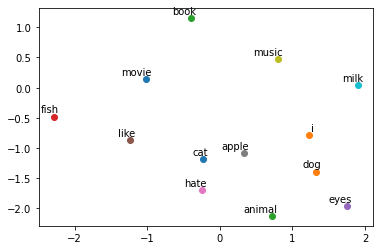

In [44]:
for i, label in enumerate(word_list):
    W, WT = model.parameters()
    x,y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

Ok, this makes no sense. The aim of this section was just to show you how to build from scratch a Word2vec. Now we will use an already (well) trained embedding...

### Word Embedding with Pre-trained Glove

[GloVe](https://nlp.stanford.edu/projects/glove/) is an unsupervised learning algorithm for obtaining vector representations for words. 

Now, using [gensim](https://github.com/RaRe-Technologies/gensim/#documentation), we download a pre-trained English embedding that was trained on Wikipedia and others open datasets.

In [0]:
import gensim.downloader as api
word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data

Given a word (i.e. a vector), we can find its most similar word (i.e. closest vectors).

In [0]:
word_vectors.most_similar('airplane'), word_vectors.most_similar('sea')

In [0]:
word_vectors.most_similar('second'), word_vectors.most_similar('lie')

Once a word is a vector, not only you can compute similarities between words but also operations. Let's have a look:

In [0]:
result = word_vectors.most_similar(positive=['helicopter', 'wings'])
print("{}: {:.4f}".format(*result[0]))

In [0]:
result = word_vectors.most_similar(positive=['plane'], negative=['wings'])
print("{}: {:.4f}".format(*result[0]))

And again...

In [0]:
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

result = word_vectors.most_similar(positive=['man', 'queen'], negative=['woman'])
print("{}: {:.4f}".format(*result[0]))

look this...

In [0]:
result = word_vectors.most_similar(positive=['thames', 'paris'], negative=['london'])
print("{}: {:.4f}".format(*result[0]))

*Find* the intruder:

In [0]:
print(word_vectors.doesnt_match("breakfast cereal dinner lunch".split()))
print(word_vectors.doesnt_match("obama kennedy trump dylan".split()))
print(word_vectors.doesnt_match("paris milano moscow hamburg madrid cake".split()))

## Contextual Embeddings


<center>  <img src="https://docs.google.com/uc?export=download&id=1RkOQccAo00Q-KU3ROk5oe3PcnqlAx99u" width="650" height="400"> </center> 

To have a wider overview I suggest you this slide from [Stanford Edu](https://web.stanford.edu/class/cs224n/slides/Jacob_Devlin_BERT.pdf). They are about Pre-trained Contextual Embedding history and zoology.

Previously, we associated a vector at each word. The correspondence was one-to-one. However, words can have different meanings in different contexts.

Thus, we need an embedding mechanism that can understand a word in its context.
The main goal of contextual word embedding is to try to capture a word token’s meaning primarily through the specific context it appears in. This means that every instance of *secondo* will have a different word vector; those with a context that looks like a context for references to time are expected to be close to each other, while those that are likely contexts for references to position (2nd) centers will cluster elsewhere in vector space.

The topic of contextual embedding is very interesting and recent (a bit more than a couple of years!). Despite its young age, in these two years lots of papers and models have been produced. The fundamental unit of state-of-the-art models, called **Transformer architecture**, is too complicated to code from scratch in a limited time.

Therefore, in these lectures (Next Notebook) we will limit ourself to:

- Have an intuition about the basic mechanism behind Transformers: The Attention Mechanism

- Intruducing BERT-like models and use them as a tool to solve a complex task.



>  —  The reasons for BERT's state-of-the-art performance on these natural language understanding tasks are not yet well understood. — (Wikipedia)

### The Self-Attention Mechanism

The Attention Mechanism, especially self-attention, is the main idea behind recent outstanding progress in NLP (and not only!). In particular, it is the core idea behind the Transformer architecture, first exposed in this revolutionary paper [Vaswani & al., 2017](https://arxiv.org/abs/1706.03762) by Google Brain.

One advantage of Transformer over its RNN counterpart (previous state-of-the-art model) was its non sequential attention model. Remember, the RNNs had to
iterate over each element of the input sequence one-by-one and carry an "updatable-state" between each hop. With Transformer, the model is able to look at every position in the sequence, at the same time, in one operation.

To have an intuitive idea about we will go through these [slides](https://docs.google.com/presentation/d/1HVAYCflD-KlQ6LOpkPCEqd-LVnx8gyIY6D1hykKvhCU/edit?usp=sharing).


<center>  <img src="https://docs.google.com/uc?export=download&id=1cujjCUV98lgKX6Qv13G2F6s5LTwkod5K" width="600" height="600"> </center> 